In [1]:
import geopandas as gpd
import atlite
import cartopy.io.shapereader as shpreader
import pandas as pd

In [2]:
shp = shpreader.Reader(
    shpreader.natural_earth(
        resolution="10m", category="cultural", name="admin_1_states_provinces"
    )
)

In [3]:
prt_records = list(
    filter(lambda r: r.attributes["iso_3166_2"].startswith("PT"), shp.records())
)

In [4]:
portugal_1 = (
    gpd.GeoDataFrame([{**r.attributes, "geometry": r.geometry} for r in prt_records])
    .rename(columns={"iso_3166_2": "state"})
    .set_index("state")
    .set_crs(4236)
)

<Axes: >

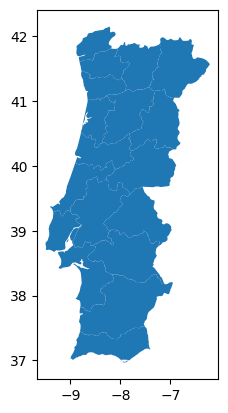

In [5]:
portugal_1 = portugal_1.cx[-10:,:]
portugal_1.plot()

In [6]:
cutout = atlite.Cutout(
    path="cutout_csp.nc",  # previous file I had, from the Portugal example
)

In [7]:
csp = cutout.csp(  # I work!
    installation="SAM_solar_tower",
    normalize=True,
    shapes=portugal_1
)
csp

<xarray.DataArray (time: 744, state: 18)> Size: 107kB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(744, 18))
Coordinates:
  * time     (time) datetime64[ns] 6kB 2019-05-01 ... 2019-05-31T23:00:00
  * state    (state) object 144B 'PT-07' 'PT-12' 'PT-16' ... 'PT-13' 'PT-18'
Attributes:
    units:    per unit of installed capacity

<Axes: >

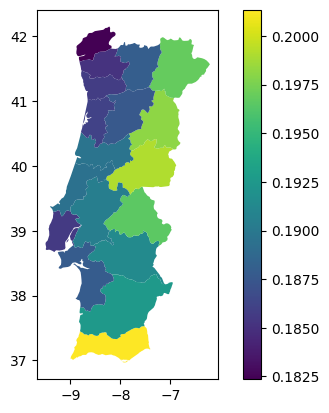

In [8]:
mean = csp.mean("time").to_series()
portugal_1.plot(column=mean, legend=True)

In [ ]:
csp = cutout.csp(  # I don't :(
    installation="SAM_solar_tower",
    normalize=True,
    cumulate=True,
    shapes=portugal_1
)
csp

In [ ]:
mean = csp.mean("time").to_series()
portugal_1.plot(column=mean, legend=True)

In [ ]:
csp = cutout.csp(  # I work!
    installation="SAM_solar_tower",
    shapes=portugal_1
)
csp

In [ ]:
mean = csp.mean("time").to_series()
portugal_1.plot(column=mean, legend=True)